In [111]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [112]:
data = pd.read_csv('Pokemon.csv')

# Extract relevant columns
features = ['Attack', 'Defense', 'Sp. Atk']
X_scaled = data[['Attack', 'Defense', 'Sp. Atk']].values

# Normalize the data
scaler = StandardScaler()


In [113]:
# Jaccard Similarity calculations

def jaccard_similarity(pokemon1, pokemon2):
    intersection = len(set(pokemon1) & set(pokemon2))
    union = len(set(pokemon1) | set(pokemon2))
    return intersection / union

def get_top_jaccard_similar_pokemon(target_pokemon, k=10):
    similarities = []
    for _, row in data.iterrows():
        if row['Name'] != 'Pikachu':  # Exclude Pikachu
            similarity = jaccard_similarity(target_pokemon, row[features])
            similarities.append((row['Name'], similarity))
    return sorted(similarities, key=lambda x: x[1], reverse=True)[:k]



In [114]:
# Cosine similarity calculations

def get_top_cosine_similar_pokemon(target_pokemon, k=10):
    similarities = []
    for i, row in data.iterrows():
        if row['Name'] != 'Pikachu':  # Exclude Pikachu
            cosine_similarities = cosine_similarity([target_pokemon], [X_scaled[i]])
            similarities.append((row['Name'], cosine_similarities[0][0]))
    return sorted(similarities, key=lambda x: x[1], reverse=True)[:k]


In [115]:
# Dimenstionality reduction calculations

def get_top_pca_similar_pokemon(target_pokemon, k=10):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    target_pca = pca.transform([target_pokemon])
    similarities = cosine_similarity(target_pca, X_pca)
    similar_indices = similarities.argsort()[0][::-1][:k]
    return [(data.iloc[i]['Name'], similarities[0][i]) for i in similar_indices]


In [116]:
pikachu_stats = data[data['Name'] == 'Pikachu'][['Attack', 'Defense', 'Sp. Atk']].values[0].tolist()

top_jaccard_similar = get_top_jaccard_similar_pokemon(pikachu_stats)
top_cosine_similar = get_top_cosine_similar_pokemon(pikachu_stats)
top_pca_similar = get_top_pca_similar_pokemon(pikachu_stats)

print("Top 10 Pokemon most similar to Pikachu using Jaccardian Similarity:")
for elem in top_jaccard_similar:
    print(elem)

print("\nTop 10 Pokemon most similar to Pikachu using Cosine Similarity:")
for elem in top_cosine_similar:
    print(elem)

print("\nTop 10 Pokemon most similar to Pikachu using Dimensionality Reduction (PCA):")
for elem in top_pca_similar:
    print(elem)


Top 10 Pokemon most similar to Pikachu using Jaccardian Similarity:
('Venonat', 1.0)
('Spheal', 1.0)
('Poliwag', 0.6666666666666666)
('Meditite', 0.6666666666666666)
('Baltoy', 0.6666666666666666)
('Tympole', 0.6666666666666666)
('Minccino', 0.6666666666666666)
('Pidgeotto', 0.5)
('Vulpix', 0.5)
('Oddish', 0.5)

Top 10 Pokemon most similar to Pikachu using Cosine Similarity:
('Arcanine', 0.9999999999999998)
('Carnivine', 0.9999876429704545)
('LandorusIncarnate Forme', 0.9999655764081966)
('Eelektross', 0.9998153860669443)
('Basculin', 0.9998032107511514)
('Skiddo', 0.9997726633774969)
('Ho-oh', 0.9994796962966362)
('Meowth', 0.9994120174077237)
('Seismitoad', 0.9992498439462307)
('Stantler', 0.9991344810906279)

Top 10 Pokemon most similar to Pikachu using Dimensionality Reduction (PCA):
('Pikachu', 0.9999999999999999)
('Castform', 0.9999990105064577)
('Tympole', 0.9999945882848786)
('Spritzee', 0.9999871595613217)
('Gothita', 0.9999717367769588)
('Voltorb', 0.9999717367769588)
('Vulpi

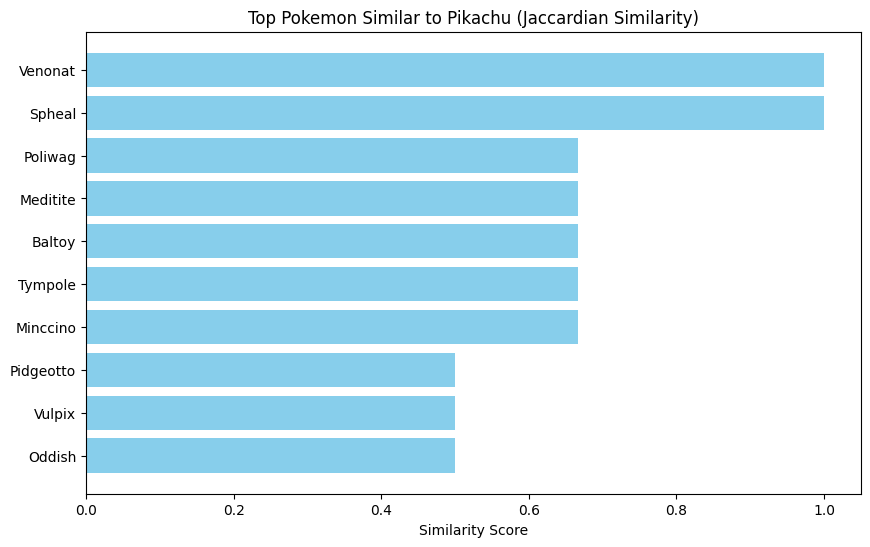

In [117]:
# Visual representaton of Jaccard similarity 

pokemon_names = []
similarity_scores = []

for elem in top_jaccard_similar:
    pokemon_names.append(elem[0])
    similarity_scores.append(elem[1])

plt.figure(figsize=(10, 6))
plt.barh(pokemon_names, similarity_scores, color='skyblue')
plt.xlabel('Similarity Score')
plt.title('Top Pokemon Similar to Pikachu (Jaccardian Similarity)')
plt.gca().invert_yaxis()
plt.show()


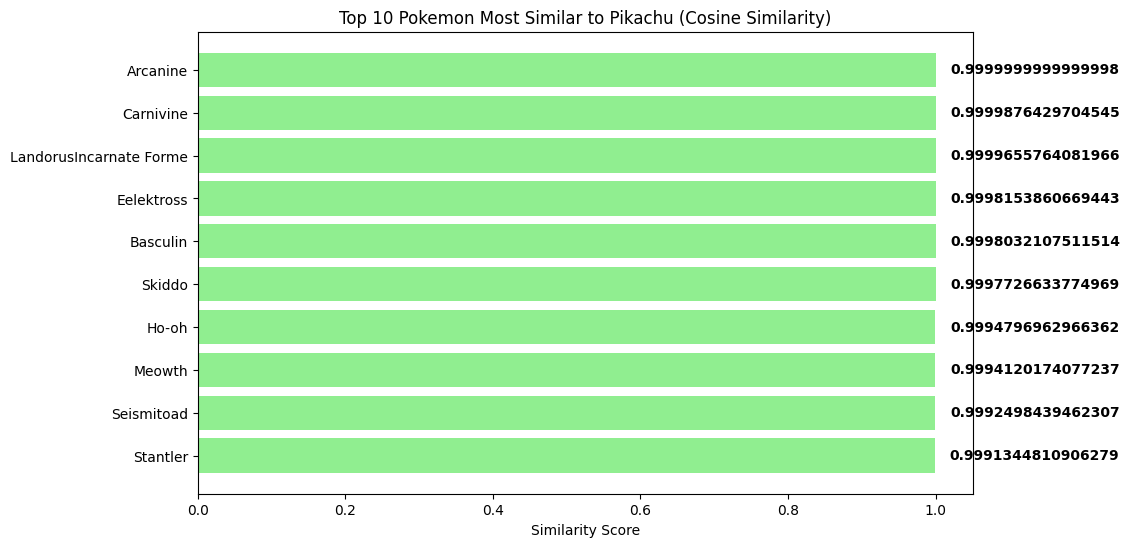

In [118]:
# Visual representaton of Cosine Similarity 

pokemon_names = []
similarity_scores = []

for elem in top_cosine_similar:
    pokemon_names.append(elem[0])
    similarity_scores.append(elem[1])

plt.figure(figsize=(10, 6))
plt.barh(pokemon_names, similarity_scores, color='lightgreen')
plt.xlabel('Similarity Score')
plt.title('Top 10 Pokemon Most Similar to Pikachu (Cosine Similarity)')

for i, v in enumerate(similarity_scores):
    plt.text(v + 0.02, i, str(v), color='black', va='center', fontweight='bold')

plt.gca().invert_yaxis()
plt.show()


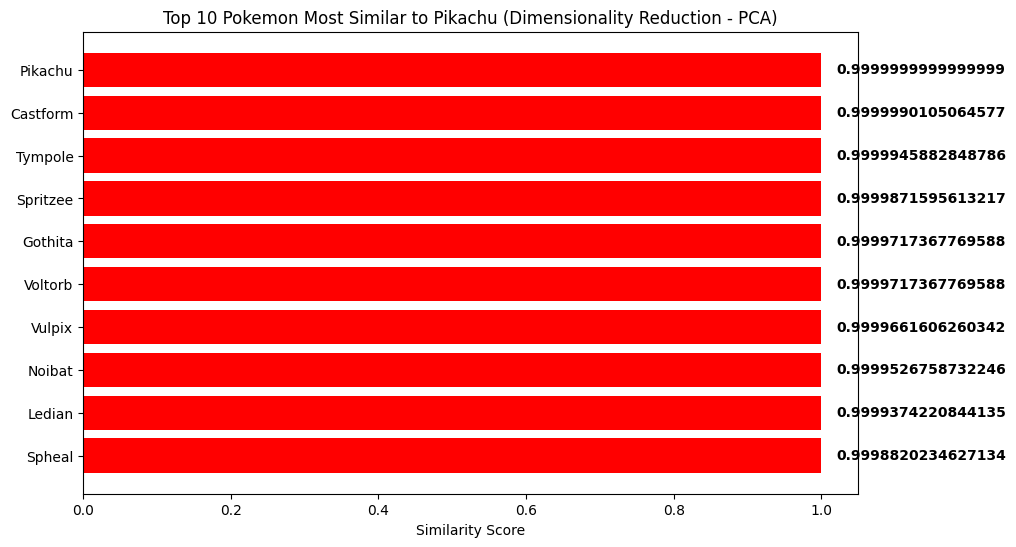

In [119]:
# Visual representaton of Cosine Similarity 

pokemon_names = []
similarity_scores = []

for elem in top_pca_similar:
    pokemon_names.append(elem[0])
    similarity_scores.append(elem[1])

plt.figure(figsize=(10, 6))
plt.barh(pokemon_names, similarity_scores, color='red')
plt.xlabel('Similarity Score')
plt.title('Top 10 Pokemon Most Similar to Pikachu (Dimensionality Reduction - PCA)')

for i, v in enumerate(similarity_scores):
    plt.text(v + 0.02, i, str(v), color='black', va='center', fontweight='bold')

plt.gca().invert_yaxis()
plt.show()
